# Import Necessary Libraries

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
train_data = pd.read_csv("Data/DailyDelhiClimateTrain.csv")
test_data = pd.read_csv("Data/DailyDelhiClimateTest.csv")

In [4]:
train_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [14]:
test_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [9]:
train_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [10]:
test_data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


# Data Analysis

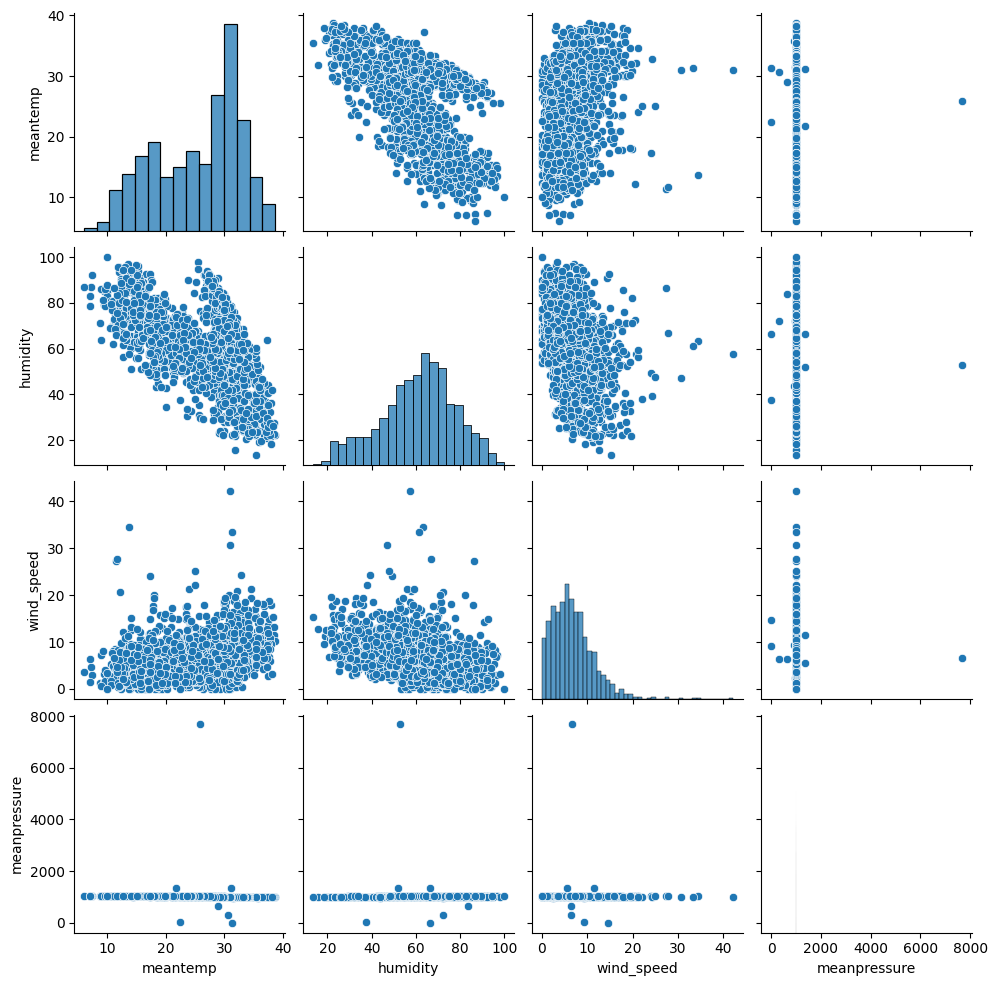

In [13]:
sns.pairplot(train_data)

# Temperature with respect to time comparision

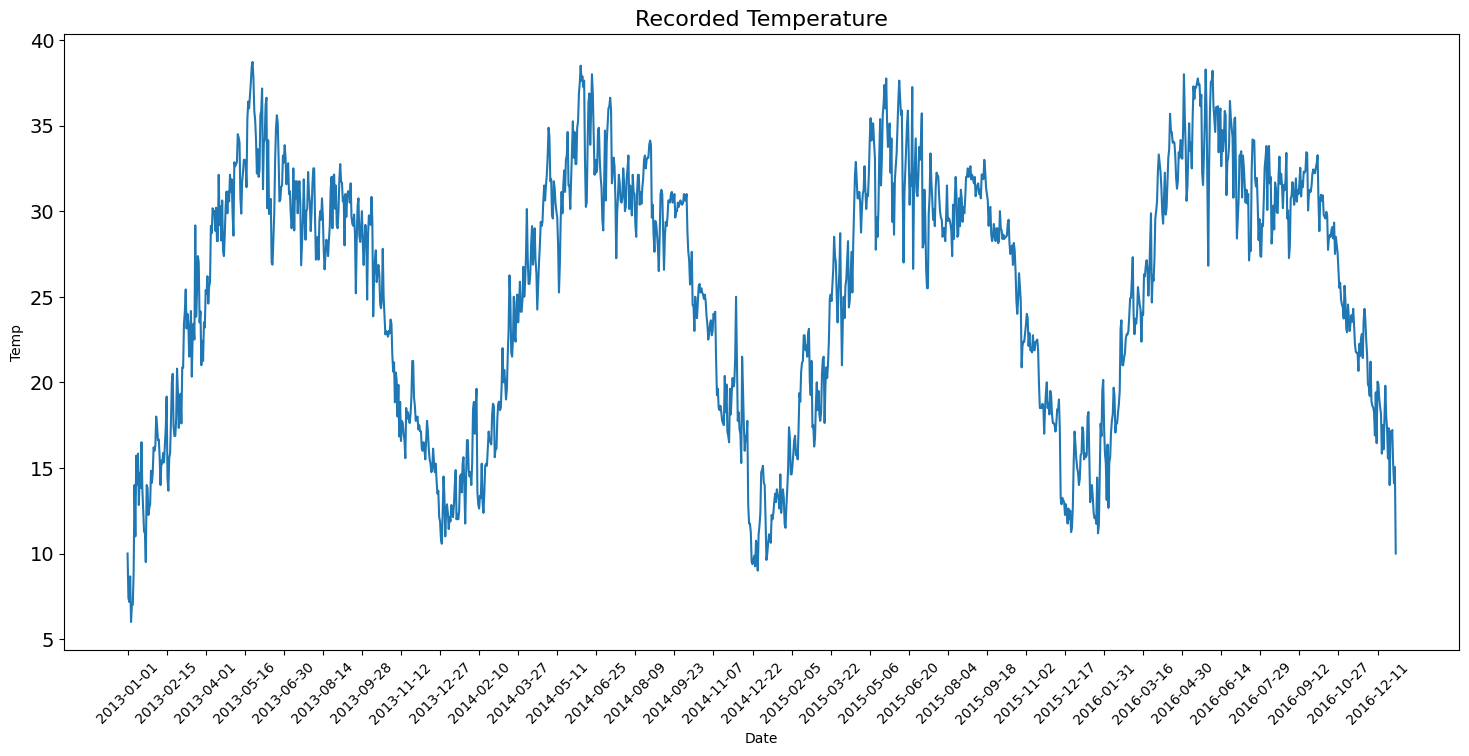

In [20]:
plt.figure(figsize=(18, 8))
plt.plot(train_data.date, train_data["meantemp"])
plt.xlabel("Date")
plt.ylabel("Temp")
plt.xticks(np.arange(0, len(train_data.date) + 1, 45), rotation=45,)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature", fontsize=16)
plt.show()

Temperature years on record :::  [2013 2014 2015 2016]


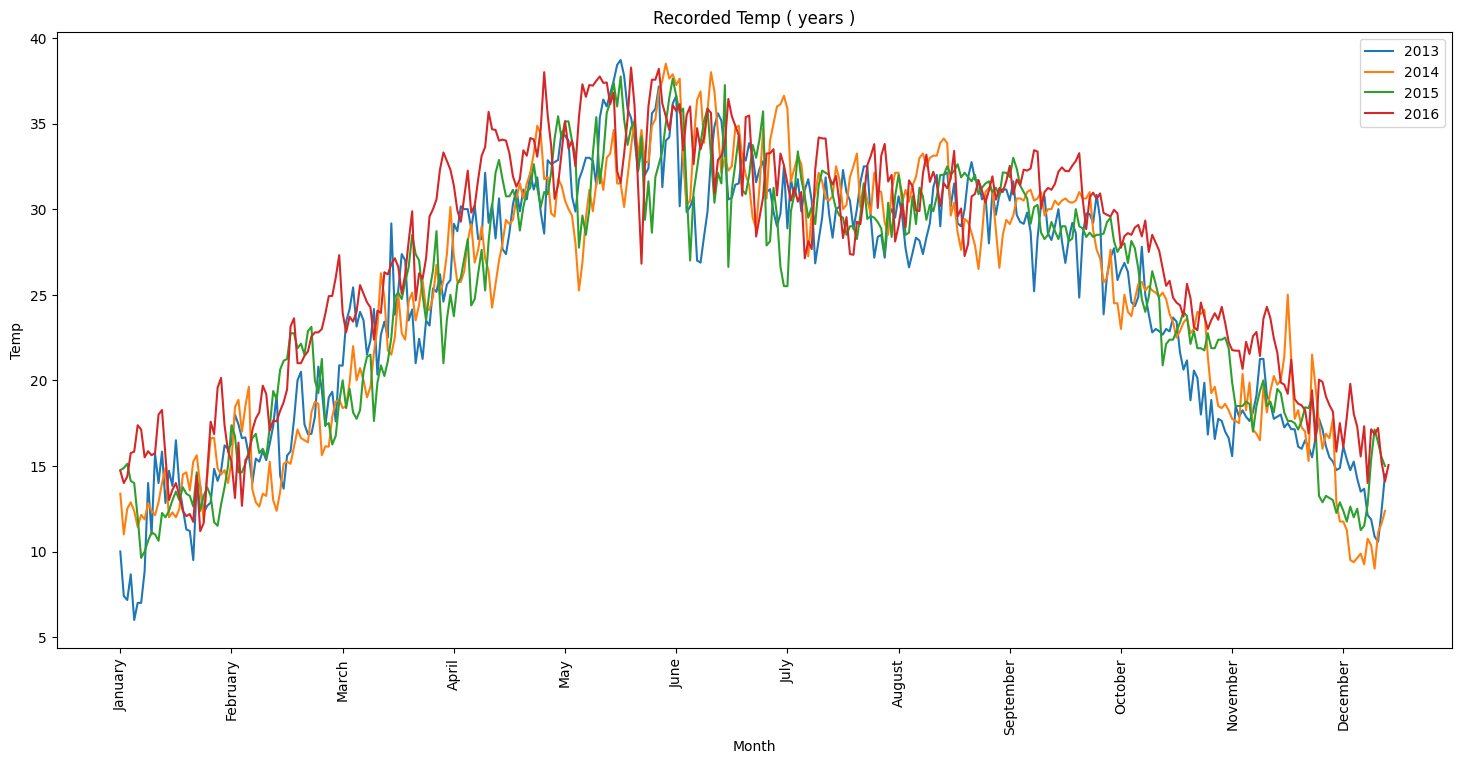

In [31]:
plt.figure(figsize=(18, 8))
dates = pd.to_datetime(train_data.date.iloc[: - 1])
print(f"Temperature years on record ::: ", dates.dt.year.unique())
for i in dates.dt.year.unique():
    plt.plot(train_data["meantemp"].iloc[: - 1][dates.dt.year == i].values, label=i)
plt.xlabel("Month")
plt.ylabel("Temp")
plt.title("Recorded Temp ( years )")
plt.xticks(np.arange(0, 365, 32), labels=dates.dt.month_name().unique(), rotation=90)
plt.legend()
plt.show()

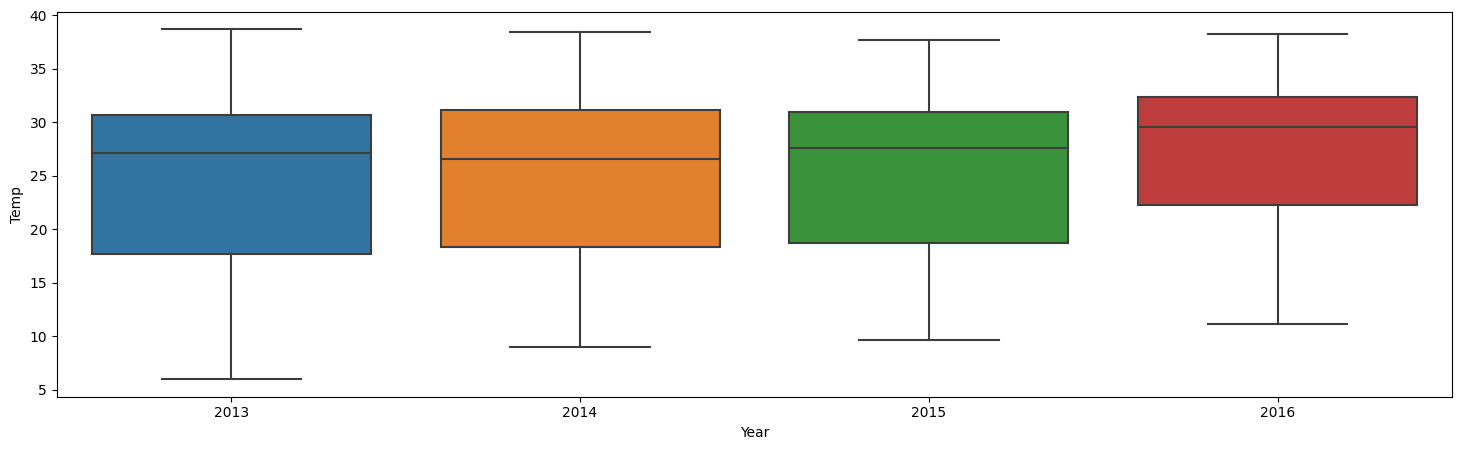

In [42]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=dates.dt.year.iloc[:-1], y="meantemp", data = train_data.iloc[:-1])
plt.xlabel("Year")
plt.ylabel("Temp")
plt.show()

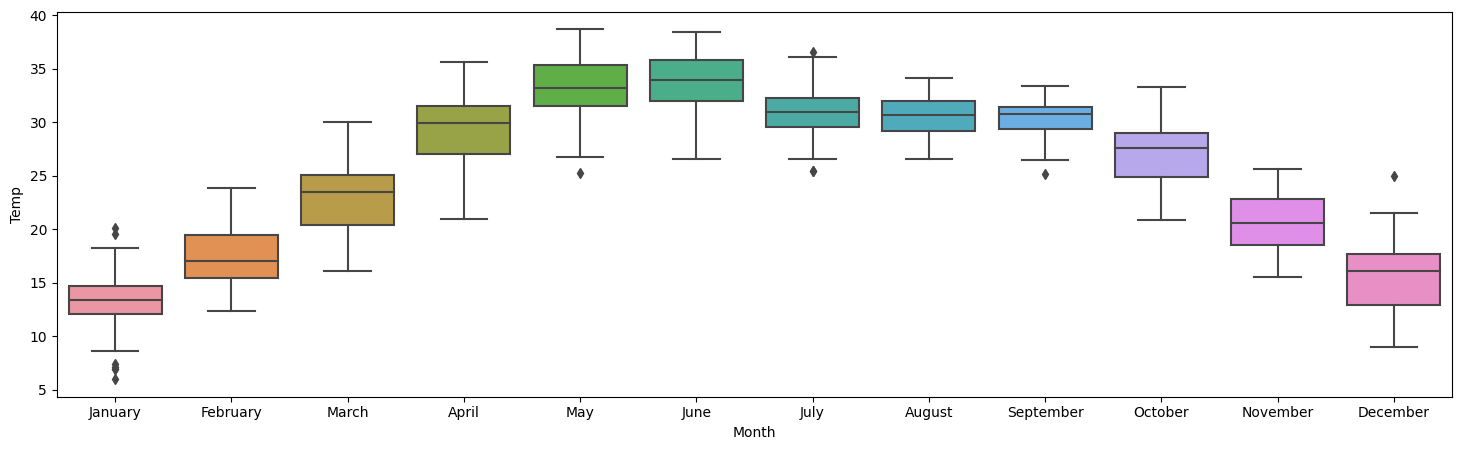

In [45]:
plt.figure(figsize=(18, 5))
sns.boxplot(x=dates.dt.month.iloc[:-1], y="meantemp", data = train_data.iloc[:-1])
plt.xlabel("Month")
plt.ylabel("Temp")
plt.xticks(np.arange(0, 12), labels=dates.dt.month_name().unique())
plt.show()

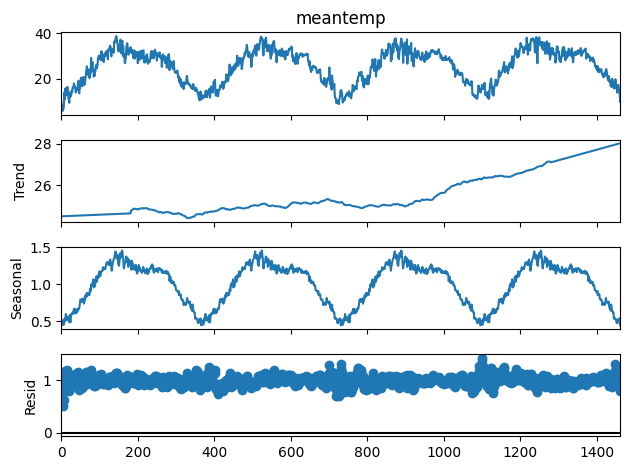

In [49]:
# multiplicative decomposition

mul_decomp = seasonal_decompose(train_data["meantemp"], model='multiplicative', extrapolate_trend='freq', period=365)
mul_decomp.plot()
plt.show()

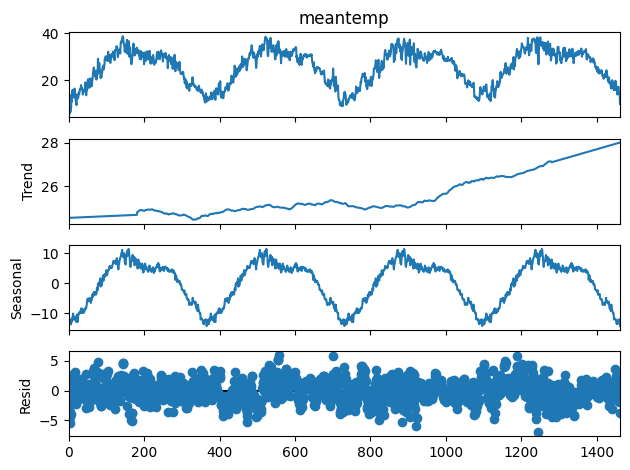

In [51]:

mul_decomp = seasonal_decompose(train_data["meantemp"], model='additive', extrapolate_trend='freq', period=365)
mul_decomp.plot()
plt.show()